# Исследование данных о российском кинопрокате



# Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Набор данных, опубликованных на портале открытых данных Министерства культуры, содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

# Исходные данные.  

Датасет mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

    - title — название фильма;
    - puNumber — номер прокатного удостоверения;
    - show_start_date — дата премьеры фильма;
    - type — тип фильма;
    - film_studio — студия-производитель;
    - production_country — страна-производитель;
    - director — режиссёр;
    - producer — продюсер;
    - age_restriction — возрастная категория;
    - refundable_support — объём возвратных средств государственной поддержки;
    - nonrefundable_support — объём невозвратных средств государственной поддержки;
    - financing_source — источник государственного финансирования;
    - budget — общий бюджет фильма;
    - ratings — рейтинг фильма на КиноПоиске;
    - genres — жанр фильма.

Обратим внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Датасет mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

    - puNumber — номер прокатного удостоверения;  
    - box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Для начала импортируем нужные библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Установим опцию по выводу всех колонок dataframe:
pd.set_option('display.max_columns', None)
# Установим опцию: текст в ячейке отражался полностью вне зависимости от длины, с тремя знаками после запятой
pd.set_option('display.float_format', '{:,.3f}'.format)

In [3]:
# открываем и сохраняем файлы mkrf_movies.csv и mkrf_shows.csv в датафрейм из директории или по ссылке:
try:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [4]:
# выведем первые пять строк датафрейма mkrf_movies:
mkrf_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В датасете mrkf_movies 14 стобцов и 7486 записей. Многие столбцы датафрейма имеют тип object, в том числе и столбец puNumber, остальные float64

In [6]:
# выведем первые пять строк датафрейма mkrf_shows посмотрим информацию по нему:
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.000"
1,111000115,"61,040.000"
2,111000116,"153,030,013.400"
3,111000117,"12,260,956.000"
4,111000118,"163,684,057.790"


In [7]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В таблице mrkf_shows содержится информация о меньшем количестве фильмов, поэтому базовой таблицей для объединения выберем mrkf_movies, объединение будем проводить по общему столбцу с номерами прокатных удостоверений `puNumber`. Столбец `puNumber` имеет разный тип данных в датафреймах - изменим тип данных с object на int в столбце puNumber таблицы mkrf_movies.

In [8]:
# mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

проверим столбец на не цифровые значения

In [9]:
# Проверим, что все символы в строках это цифры:
mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# В строке 804 по-видимому есть пробелы, исправляем удалением пробелов из заданной строки:
mkrf_movies.loc[804, 'puNumber'] = mkrf_movies.loc[804, 'puNumber'].strip()

In [11]:
# отсутствующее значение в строке 1797 найдем на сайте mkrf.ru ( в разделе "Реестр прокатных удостоверений фильмов")
# и произведём замену:
#mkrf_movies.at[1797, 'puNumber'] = 111009614

In [12]:
mkrf_movies['puNumber'].where(~(mkrf_movies.puNumber == 'нет'), other=111009614, inplace=True)

In [13]:
# приведем в числовой тип данные столбца puNumber:
#mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors= 'coerce')

In [14]:
# проверяем:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [15]:
# объеденим датафреймы в один по столбцу puNumber:
mkrf = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [16]:
# Сразу приведём названия колонок к змеиному регистру (puNumber).
mkrf = mkrf.rename(columns={'puNumber': 'pu_number'})

In [17]:
# Посмотрим полную информацию датафрейма:
mkrf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Объединили все данные в одну таблицу, добавив информацию о кассовых сборах к части строк.

Привели названия столбцов в соответствие стандарту PEP8.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [18]:
# Переведем значения в столбце show_start_date (дата премьеры фильма) в формат даты:
mkrf['show_start_date'] = pd.to_datetime(mkrf['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
# Проверяем:
mkrf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [20]:
# Рассмотрим столбец ratings(рейтинг фильма на КиноПоиске):
mkrf['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце ratings есть проблемные значения, в виде процентных значений, от которых надо избавиться прежде чем менять тип столбца.

При изучении формирования рейтинга фильмов и попытке соотнести проценты с рейтингом, как неправильно заполненые зачения, было выяснено: переводить процент в рейтинг не корректно, т.к. процент скорее всего обозначает долю критиков, которые оценили фильм как "хороший". На основании этого принято решение заменить процентные значения на баллы (убрав процент и разделив на 10).

In [21]:
mkrf['ratings'] = mkrf['ratings'].str.replace('%','')
mkrf['ratings'] = mkrf['ratings'].str.strip()
# Меняем тип данных:
mkrf['ratings'] = mkrf['ratings'].astype('float64')

def ratings_func(row):
    rating = row['ratings']
    
    if rating > 10:
        return(rating / 10)
    else:
        return(rating)
    
mkrf['ratings'] = mkrf.apply(ratings_func, axis=1)

Посмотрим на столбцы `type`(тип фильма), `age_restriction`(возрастная категория), `financing_source`(источник государственного финансирования):

In [22]:
mkrf['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [23]:
mkrf['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [24]:
mkrf['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

для экономии памяти переведем столбцы `type`, `age_restriction`, `financing_source` в категорийный тип данных:

In [25]:
mkrf['type'] = mkrf['type'].astype('category')

In [26]:
mkrf['age_restriction'] = mkrf['age_restriction'].astype('category')

In [27]:
mkrf['financing_source'] = mkrf['financing_source'].astype('category')

In [28]:
mkrf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   category           
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   category           
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [29]:
mkrf.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4327
dtype: int64

- `film_studio` - 18 пропусков;
- `production_country` - 2 пропуска;
- `director` - 9 пропусков;
- `producer` - 568 пропусков;
- Пропущена значительная часть данных в `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. Но в описании указано, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Также бюджет этих фильмов указан с учетом государственной поддержки;
- `ratings` - 996 пропусков;
- `genres` -  976.

Пройдемся по столбцам с пропусками.

**Столбец `film_studio`**(студия-производитель)

In [30]:
# Посмотрим на строки с пропущенными значениями:
mkrf[mkrf['film_studio'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.300,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.000"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.900,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Из таблицы делаем вывод, что авторское кино спонсировала не студия-производитель, а сами авторы (продюсер, режиссер). В любом случае 18 фильмов - это 0.24% от общего объема данных и особого влияния на исследования не произведет. Осталяем как есть.

**Столбец `production_country`** (страна-производитель)

In [31]:
# Посмотрим на строки с пропущенными значениями:
mkrf[mkrf['production_country'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.200,"детский,комедия","194,527.000"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN


Это фильмы российского производства - поправим 2 строчки.

In [32]:
mkrf.loc[mkrf['production_country'].isna() == True, 'production_country'] = 'Россия'

**Столбец `director` и `producer`**

- `director` - 9 пропусков;
- `producer` - 568 пропусков;

Информация данных столбцов в исследовании не участвует - оставляем как есть.

**Столбцы `ratings, genres и box_office`**  
Значительное количество пропусков. 
- `ratings` (рейтинг фильма на КиноПоиске) - 996 пропусков;
- `genres` (жанр фильма) -  976 пропусков;
- `box_office` (сборы в рублях) - 4327.  

Пропущенная информация может быть следствием человеческого фактора при заполнении или ошибкой при выгрузке данных. В любом случае данную информацию восстановить не откуда, т.к. единственный источник данных mkrf.ru. Оставляем как есть.

In [33]:
mkrf['producer'] = mkrf['producer'].fillna ('Unknown')

In [34]:
mkrf['director'] = mkrf['director'].fillna ('Unknown')

In [35]:
mkrf['film_studio'] = mkrf['film_studio'].fillna ('Unknown')

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим на явные дубликаты:

In [36]:
mkrf.duplicated().sum()

0

Для поиска неявных дубликатов изучим столбец `title` (название фильма) и `pu_number` (номер прокатного удостоверения)

In [37]:
# столбец `title`:
mkrf[mkrf['title'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.100,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.700,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.500,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.900,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.500,"триллер,драма","175,003.510"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"триллер,криминал,детектив",NaN


In [38]:
#Проверим у каких фильмов больше всего прокатных удостоверений:
mkrf['title'].value_counts()

День святого Валентина_                  5
Кошки против собак: Месть Китти Галор    4
Дитя тьмы                                4
Двойной копец                            4
Прощание                                 4
                                        ..
WINX Club 3D: Волшебное приключение      1
МУЛЬТ в кино. Выпуск № 50                1
302 БИС                                  1
Баллистика: Экс против Сивер.            1
Бабье царство_                           1
Name: title, Length: 6772, dtype: int64

In [39]:
mkrf[mkrf['title'] == 'Жена путешественника во времени']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3794,Жена путешественника во времени,221010310,2010-01-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"фантастика,фэнтези,драма",NaN
4077,Жена путешественника во времени,221004110,2010-01-19 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"фантастика,фэнтези,драма",NaN
4096,Жена путешественника во времени,221055510,2010-04-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"фантастика,фэнтези,драма",NaN
4829,Жена путешественника во времени,221014211,2011-01-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"фантастика,фэнтези,драма",NaN


Повторы в столбце `title` (название фильма) объясняются наличием нескольких прокатных удостоверений на один фильм, выданных в разное время и/или разным прокатчикам и/или фильм мог поменять правообладателя или даже быть немного изменён для каких-либо творческих или коммерческих целей. Оставим как есть

Дубликаты столбец `pu_number` (номер прокатного удостоверения)

In [40]:
mkrf['pu_number'].duplicated().sum()

3

In [41]:
# столбец `pu_number`
mkrf[mkrf['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.000
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.000,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.400,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


В столбце pu_number так же есть дубликаты, но всего 3. В первом случае (Курбан-роман. (История с жертвой)) разное время даты премьеры, во втором случае (Как жениться и остаться холостым, Иоанна - женщина на папском престоле /По роман...) два разных фильма под одним прокатным удостоверением. в остальных разное значение рейтинга. В данном случае на анализ это не повлияет. Оставим как есть.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [42]:
# посмотрим на значения в столбце `type`:
mkrf['type'].unique()

['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']
Categories (8, object): ['Художественный', 'Анимационный', 'Прочие', 'Документальный', 'Научно-популярный', ' Художественный', ' Анимационный', 'Музыкально-развлекательный']

In [43]:
# удаляем пробелы в начале и в конце строк:
mkrf['type'] = mkrf['type'].str.strip()

In [44]:
mkrf['type'] = mkrf['type'].astype('category')

In [45]:
# проверяем:
mkrf['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [46]:
mkrf['age_restriction'].unique()

['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«0+» - для любой зрительской аудитории']
Categories (5, object): ['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет', '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', '«0+» - для любой зрительской аудитории']

In [47]:
mkrf['financing_source'].unique()

[NaN, 'Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']
Categories (3, object): ['Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']

In [48]:
mkrf.tail()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.400,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.300,"комедия,вестерн",NaN


Пробелов в начале и/или в конце строки нет.  
Некоторые значения в категориальных переменных хранятся как списки - несколько стран, режиссеров, студий, жанров и т.д. Вернемся к обработке необходимых для исследований значений позже.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Посмотрим на количественные значения:
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `budget` — общий бюджет фильма;
- `box_office` — сборы в рублях.

In [49]:
# выделим столбцы с количественными значениями:
groups = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']

In [50]:
# Познакомимся с данными поближе и просмотрим числовые значения методом describe()
mkrf[groups].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.000,332.000,332.000,"3,159.000"
mean,"11,864,457.831","48,980,988.892","127,229,716.684","76,454,486.381"
std,"24,916,555.264","59,980,117.923","188,588,333.115","240,318,917.439"
min,0.000,0.000,0.000,0.000
25%,0.000,"25,000,000.000","42,000,000.000","85,671.500"
50%,0.000,"30,000,000.000","68,649,916.000","2,325,871.100"
75%,"15,000,000.000","40,375,000.000","141,985,319.500","23,976,224.350"
max,"180,000,000.000","400,000,000.000","2,305,074,303.000","3,073,568,690.790"


Присутствуют фильмы с нулевым бюджетом, посмотрим такие значения

In [51]:
mkrf[mkrf['budget'] == 0].describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.000,17.000,17.000,17.000,16.000,17.000
mean,"112,067,204.471","16,705,882.353","65,174,674.412",0.000,5.725,"163,137,294.425"
std,"1,473,501.270","20,064,784.779","61,236,204.091",0.000,0.916,"251,115,991.429"
min,"111,000,415.000",0.000,0.000,0.000,4.300,"1,334,699.400"
25%,"111,009,615.000",0.000,"23,000,000.000",0.000,5.075,"50,451,949.000"
50%,"111,017,315.000","10,000,000.000","51,000,000.000",0.000,5.700,"72,937,783.200"
75%,"114,001,715.000","20,000,000.000","75,000,000.000",0.000,6.300,"184,487,551.400"
max,"114,006,518.000","60,000,000.000","250,000,000.000",0.000,7.800,"1,038,321,489.000"


 У фильмов с нулевым бюджетом сумма поддержки ненулевая. В этом случае бюджет не может быть меньше суммы поддержки. Проверим кинокартины, у которых бюджет меньше суммы возвратных и невозвратных средств государственной поддержки.

In [52]:
budget_zero = mkrf[mkrf['budget'] < mkrf['nonrefundable_support'] + mkrf['refundable_support']]
budget_zero

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000,"23,000,000.000",0.000,"Министерство культуры, Фонд кино",6.600,мелодрама,"10,234,016.100"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,"75,000,000.000",0.000,Фонд кино,6.600,драма,"446,163,511.000"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.000","70,000,000.000",0.000,Фонд кино,7.800,"боевик,драма,криминал","196,572,438.400"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.000",0.000,0.000,Фонд кино,6.200,"комедия,фэнтези","67,418,974.800"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.000","100,000,000.000",0.000,Фонд кино,4.600,"мультфильм,приключения,фэнтези","184,487,551.400"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000,"59,000,000.000",0.000,Фонд кино,6.300,"комедия,драма","1,957,738.510"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,"35,000,000.000",0.000,Фонд кино,5.100,"комедия,мелодрама","72,937,783.200"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000,"6,000,000.000",0.000,Министерство культуры,4.300,комедия,"15,362,931.430"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.000","51,000,000.000",0.000,Фонд кино,6.300,"комедия,мелодрама","70,299,052.000"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000,"250,000,000.000",0.000,Фонд кино,5.600,фантастика,"1,038,321,489.000"


итого 17 фильмов. Заполнять данные значения как сумму поддержек некорректно - по правилам осуществления займов общий процент поддержки не может составлять 100% от бюджета фильма. Выясним в каком объёме обычно оказывалась поддержка и заменим медианным процентом от поддержки. Суммируем оба вида господдержки.

In [53]:
mkrf['support_percent'] = (mkrf['refundable_support'] + mkrf['nonrefundable_support']) / mkrf['budget']

support_percent = mkrf['support_percent'].median()
support_percent

0.6140376284219444

доля участия государства в бюджете составляет 0.6140376284219444

In [54]:
mkrf.loc[budget_zero.index, 'budget'] = (mkrf.loc[budget_zero.index, 'refundable_support']
                                         + mkrf.loc[budget_zero.index, 'nonrefundable_support']
                                        ) / support_percent

mkrf.loc[budget_zero.index]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000,"23,000,000.000","37,456,987.871","Министерство культуры, Фонд кино",6.600,мелодрама,"10,234,016.100",inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,"75,000,000.000","122,142,351.753",Фонд кино,6.600,драма,"446,163,511.000",inf
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.000","70,000,000.000","130,285,175.203",Фонд кино,7.800,"боевик,драма,криминал","196,572,438.400",inf
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.000",0.000,"32,571,293.801",Фонд кино,6.200,"комедия,фэнтези","67,418,974.800",inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.000","100,000,000.000","260,570,350.405",Фонд кино,4.600,"мультфильм,приключения,фэнтези","184,487,551.400",inf
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000,"59,000,000.000","96,085,316.712",Фонд кино,6.300,"комедия,драма","1,957,738.510",inf
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,"35,000,000.000","56,999,764.151",Фонд кино,5.100,"комедия,мелодрама","72,937,783.200",inf
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000,"6,000,000.000","9,771,388.140",Министерство культуры,4.300,комедия,"15,362,931.430",inf
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.000","51,000,000.000","113,999,528.302",Фонд кино,6.300,"комедия,мелодрама","70,299,052.000",inf
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000,"250,000,000.000","407,141,172.508",Фонд кино,5.600,фантастика,"1,038,321,489.000",inf


In [55]:
# Познакомимся с данными поближе и просмотрим числовые значения методом describe():
mkrf[groups].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.000,332.000,332.000,"3,159.000"
mean,"11,864,457.831","48,980,988.892","134,057,765.841","76,454,486.381"
std,"24,916,555.264","59,980,117.923","187,685,540.484","240,318,917.439"
min,0.000,0.000,"9,771,388.140",0.000
25%,0.000,"25,000,000.000","46,153,971.750","85,671.500"
50%,0.000,"30,000,000.000","74,592,550.000","2,325,871.100"
75%,"15,000,000.000","40,375,000.000","150,002,143.250","23,976,224.350"
max,"180,000,000.000","400,000,000.000","2,305,074,303.000","3,073,568,690.790"


Суммы количества строк совпали.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [56]:
# Выделяем из даты премьеры год и записываем в отдельный столбец:
mkrf['show_start_year'] = mkrf['show_start_date'].dt.year

In [57]:
# Проверяем:
mkrf.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN,NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN,NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [58]:
# Создадим собственную функцию:
def first_value(s):
    value_lst = s.split(',')
    return value_lst[0]

In [59]:
# Применим к двум столбцам:
mkrf['director_main'] = mkrf['director'].dropna().apply(first_value)
mkrf['genres_main'] = mkrf['genres'].dropna().apply(first_value)

In [60]:
# Проверяем:
mkrf.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,show_start_year,director_main,genres_main
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [61]:
# Добавим в таблицу столбец total_support, в котором сумируем объем возвратных и невозвратных средств:
mkrf['total_support'] = mkrf['refundable_support'] + mkrf['nonrefundable_support']

In [62]:
# Добавим в таблицу столбец support_percent с долей поддержки от бюджета фильма:
mkrf['support_percent'] = (mkrf['refundable_support'] + mkrf['nonrefundable_support']) / mkrf['budget']

In [63]:
# Познакомимся с данными поближе и просмотрим числовые значения методом describe():
mkrf.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,support_percent,show_start_year,total_support
count,"7,486.000",332.000,332.000,332.000,"6,519.000","3,159.000",332.000,"7,486.000",332.000
mean,"135,193,356.599","11,864,457.831","48,980,988.892","134,057,765.841",6.488,"76,454,486.381",0.522,"2,014.594","60,845,446.723"
std,"38,351,376.115","24,916,555.264","59,980,117.923","187,685,540.484",1.115,"240,318,917.439",0.167,3.008,"72,755,459.467"
min,"1,811,096.000",0.000,0.000,"9,771,388.140",1.000,0.000,0.044,"2,010.000","3,000,000.000"
25%,"112,025,043.000",0.000,"25,000,000.000","46,153,971.750",5.900,"85,671.500",0.385,"2,012.000","25,333,750.000"
50%,"121,015,464.500",0.000,"30,000,000.000","74,592,550.000",6.600,"2,325,871.100",0.613,"2,015.000","35,000,000.000"
75%,"124,003,313.750","15,000,000.000","40,375,000.000","150,002,143.250",7.200,"23,976,224.350",0.655,"2,017.000","60,000,000.000"
max,"231,001,111.000","180,000,000.000","400,000,000.000","2,305,074,303.000",9.900,"3,073,568,690.790",0.785,"2,019.000","500,000,000.000"


Медианная величина бюджета фильма с гос.поддержкой составляет 74,5 млн руб, в то время как средняя величина составляет 135 млн руб. Такая разница может объясняться тем, что есть некоторые фильмы, снятые с гос.поддержкой, с очень значительным бюджетом. Их бюджет повлиял на среднюю величину, но не затронул значение медианного бюджета.

Объем средств гос.поддержки в среднем составляет около 35 млн руб, т.е. около 61% от бюджета фильма. Причем гос.поддержка в основном представляет собой именно невозвратные средства в размере около 30 млн руб.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Количество картин, которые имели кассовые сборы и следовательно были показаны в кинотеатре - 3159. Это известная информация из второго датафрейма.

In [64]:
# Создадим сводную таблицу:
mkrf_pivot = mkrf.loc[mkrf['box_office'].notna(), ['show_start_year', 'box_office']
                     ].groupby('show_start_year').agg(['count', 'sum', 'mean', 'median'])
mkrf_pivot.columns = mkrf_pivot.columns.get_level_values(1)


In [65]:
# Посмотрим сводную таблицу:
mkrf_pivot

,count,sum,mean,median
show_start_year,,,,
2010,105,"2,428,654.000","23,130.038","1,700.000"
2011,109,"14,102,765.000","129,383.165","3,000.000"
2012,128,"6,955,423.000","54,339.242","5,660.000"
2013,184,"29,799,706.200","161,954.925","3,522.500"
2014,280,"7,444,951,859.200","26,589,113.783","18,137.500"
2015,465,"39,497,365,196.400","84,940,570.315","4,920,933.000"
2016,526,"47,866,299,741.910","91,000,569.852","3,846,679.410"
2017,357,"48,563,707,217.510","136,032,793.326","9,968,340.000"
2018,475,"49,668,403,134.320","104,565,059.230","8,891,102.210"


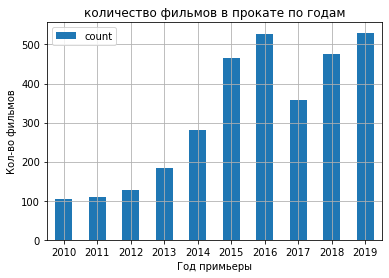

In [66]:
# Посмотрим график распределения кол-ва фильмов по годам:
mkrf_pivot.plot(title='количество фильмов в прокате по годам', kind='bar', y='count', grid=True)
plt.xticks(rotation = 0)
plt.xlabel('Год примьеры')
plt.ylabel('Кол-во фильмов');

В 2017 году отмечается провал в количестве фильмов в прокате. Несмотря на это, сумма кассового сбора продолжает свой рост. 

In [67]:
# Выведем долю фильмов, для которых есть информация о сборах:
display(f'Доля фильмов, для которых есть информация о сборах: {mkrf.box_office.notna().mean():.2f}')

'Доля фильмов, для которых есть информация о сборах: 0.42'

In [68]:
# Посмотрим на доли фильмов с кассовым сбором по годам:
ratio = (mkrf[['show_start_year','box_office']]
         .groupby('show_start_year')
         .apply(lambda x : x['box_office'].apply(pd.notna).mean())).to_frame()
ratio.rename(columns={ 0 : 'cinema_ratio'}, inplace=True)
ratio

,cinema_ratio
show_start_year,
2010,0.107
2011,0.175
2012,0.216
2013,0.292
2014,0.347
2015,0.660
2016,0.643
2017,0.707
2018,0.533


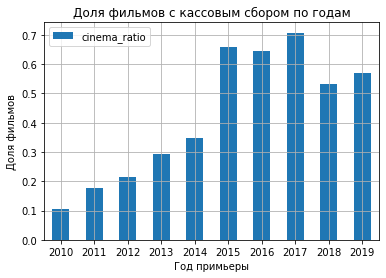

In [69]:
# Посмотрим график распределения доли фильмов с кассовым сбором по годам:
ratio.plot(title='Доля фильмов с кассовым сбором по годам', kind='bar', grid=True)
plt.xticks(rotation = 0)
plt.xlabel('Год примьеры')
plt.ylabel('Доля фильмов');

 В данной выборке меньше всего фильмов, показанных в кинотеатре, с 2010 по 2014. Доля варьируется от 10% до 35%. В связи с этим нельзя говорить о том, что в эти годы было выдано меньше прокатных удостоверений. Самое большое количество кинопоказов в кинотеатрах в 2019 - 530, хотя доля этих фильмов за этот год (57%) в нашей выборке не самая большая в сравнении с другими годами. В 2017 году самая большая доля - 70.7%.
 Доля фильмов, для которых есть информация о сборах, составляет 42% от общего объема.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

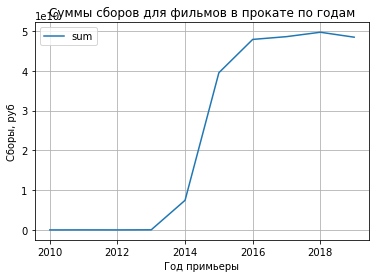

In [70]:
# Посмотрим график изменения суммы сборов для фильмов в прокате по годам:
mkrf_pivot.plot(title='Суммы сборов для фильмов в прокате по годам', kind='line', y='sum', grid=True)
plt.xlabel('Год примьеры')
plt.ylabel('Сборы, руб');

In [71]:
mkrf[['show_start_year','box_office']].groupby('show_start_year').agg('sum')

,box_office
show_start_year,
2010,"2,428,654.000"
2011,"14,102,765.000"
2012,"6,955,423.000"
2013,"29,799,706.200"
2014,"7,444,951,859.200"
2015,"39,497,365,196.400"
2016,"47,866,299,741.910"
2017,"48,563,707,217.510"
2018,"49,668,403,134.320"


In [72]:
# Выведем min и max сумму сборов:
display(f"В {mkrf_pivot['sum'].idxmin()} году сумма сборов была минимальной, в {mkrf_pivot['sum'].idxmax()} максимальной.")

'В 2010 году сумма сборов была минимальной, в 2018 максимальной.'

 Максимум суммы сборов по годам приходится на 2018 год. Года с 2010 по 2013 в расчет не берем, так как по ним меньше всего данных, поэтому принимаем за минимум 2013 год. В период с 2013 по 2018 год наблюдается увереныый рост сборов. С 2018 года наблюдается небольшое снижение.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [73]:
mkrf_pivot

,count,sum,mean,median
show_start_year,,,,
2010,105,"2,428,654.000","23,130.038","1,700.000"
2011,109,"14,102,765.000","129,383.165","3,000.000"
2012,128,"6,955,423.000","54,339.242","5,660.000"
2013,184,"29,799,706.200","161,954.925","3,522.500"
2014,280,"7,444,951,859.200","26,589,113.783","18,137.500"
2015,465,"39,497,365,196.400","84,940,570.315","4,920,933.000"
2016,526,"47,866,299,741.910","91,000,569.852","3,846,679.410"
2017,357,"48,563,707,217.510","136,032,793.326","9,968,340.000"
2018,475,"49,668,403,134.320","104,565,059.230","8,891,102.210"


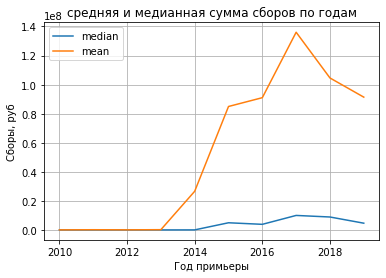

In [74]:
# Посмотрим график изменения средней и медианной суммы сборов по годам:
mkrf_pivot.plot(title='средняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'], grid=True)
plt.xlabel('Год примьеры')
plt.ylabel('Сборы, руб');

Для сборов очень большой разброс данных из-за разницы между средней и медианой. Это означает, что в данных присутствуют значения с невероятно большими сборами по сравнению с остальными. Для кино это нормально. В среднем, самый прибыльный год был 2017. Это видно и по медиане, и по средней. Однако возвращаясь к сводной таблице в столбце сумма сборов - видно, что самый большой сбор был в 2018 году.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [75]:
# Для сокращения категориальных значений в столбце age_restriction используем функцию:
def get_first_value(s):
    value_lst = s.split(' ')
    return value_lst[0]
mkrf['age_restriction_shot'] = mkrf['age_restriction'].apply(get_first_value).astype('category')

In [76]:
mkrf.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,show_start_year,director_main,genres_main,total_support,age_restriction_shot
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик,NaN,«18+»
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма,NaN,«6+»
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика,NaN,«18+»
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика,NaN,«18+»
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика,NaN,«18+»


In [77]:
# Создадим сводную таблицу с годом премьеры начиная с 2015 года:
mkrf_age = mkrf.query('2014 < show_start_year')

age_data = mkrf_age.pivot_table(
    index='show_start_year',
    columns = 'age_restriction_shot', 
    values='box_office',
    aggfunc=['sum'])

age_data

sum                                        \
age_restriction_shot            «0+»              «12+»              «16+»   
show_start_year                                                              
2015                 379,054,578.370 13,616,082,008.910 11,368,120,870.270   
2016                 150,228,848.670 12,204,446,524.390 16,664,548,541.740   
2017                 229,598,930.000  7,851,427,660.670 18,745,042,900.060   
2018                  32,449,002.110 14,267,291,660.690 16,503,602,346.960   
2019                  17,746,066.820 12,680,198,773.670 12,753,418,984.600   

                                                            
age_restriction_shot              «18+»               «6+»  
show_start_year                                             
2015                  5,432,308,367.440  8,701,799,371.410  
2016                  6,793,929,818.870 12,053,146,008.240  
2017                  9,651,495,581.020 12,086,142,145.760  
2018                  8,760,085,501.150 10,104,974,623.410  
2019                 10,121,796,303.640 12,852,548,650.860

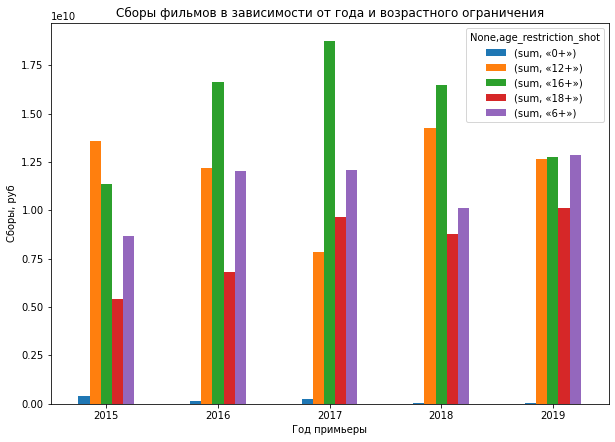

In [78]:
# Посмотрим график распределения cборов фильмов в зависимости от года и возрастного ограничения:
age_data.plot(kind='bar', figsize=(10,7))
plt.xticks(rotation = 0)
plt.title('Сборы фильмов в зависимости от года и возрастного ограничения')
plt.xlabel('Год примьеры')
plt.ylabel('Сборы, руб');

In [79]:
mkrf_age.groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории      809,077,425.970
«18+» - запрещено для детей              40,759,615,572.120
«6+» - для детей старше 6 лет            55,798,610,799.680
«12+» - для детей старше 12 лет          60,619,446,628.330
«16+» - для детей старше 16 лет          76,034,733,643.630
Name: box_office, dtype: float64

Фильмы с возрастным ограничением «16+» собрали больше всего денег в прокате.

Из приведенных таблицы и графика следует, что почти во все года лидирует по сборам кино «16+», в 2015 в лидерах кино «12+», а в 2019 - «6+». Так же видно, что 2018 год, хоть и не рекордный по сборам вкатегориях («0+», «6+», «16+», «18+»), однако сборы в категории «12+» самые высокие за весь рассматриваемый период, что делает год 2018 самым "кассовым" среди других лет. Категории «6+» и «12+» - стабильно обгоняют категорию «18+» , по-видимому из-за максимально охватываемой аудитории.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [80]:
# Выделяем эти фильмы в отдельную таблицу:
mkrf_support = mkrf[mkrf['budget'] > 0].copy()

In [81]:
# Добавим столбцы доход на основе кассовго сбора и бюджета:
mkrf_support['earn'] = mkrf_support['box_office'] - mkrf_support['budget']
# Добавим столбцы убыток:
mkrf_support['loss'] = mkrf_support['earn'] < 0
# Добавим столбцы прибыль:
mkrf_support['profit'] = mkrf_support['earn'] > 0

In [82]:
mkrf_support

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,show_start_year,director_main,genres_main,total_support,age_restriction_shot,earn,loss,profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,"26,500,000.000","79,411,900.000",Министерство культуры,8.100,"драма,мелодрама","365,353.600",0.334,2013,А.Атанесян,драма,"26,500,000.000",«16+»,"-79,046,546.400",True,False
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,"26,000,000.000","37,142,857.000",Министерство культуры,NaN,NaN,"28,140.000",0.700,2014,А.Якимчук,NaN,"26,000,000.000",«12+»,"-37,114,717.000",True,False
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,"107,847,945.000","176,023,490.000",Фонд кино,5.300,"комедия,фантастика","19,957,031.500",0.613,2013,Р.Давлетьяров,комедия,"107,847,945.000",«12+»,"-156,066,458.500",True,False
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,"28,000,000.000","40,574,140.000",Министерство культуры,4.200,драма,"55,917.500",0.690,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.000",«16+»,"-40,518,222.500",True,False
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,"25,000,000.000","40,015,122.000",Министерство культуры,6.400,драма,"232,100.000",0.625,2014,М.Угаров,драма,"25,000,000.000",«16+»,"-39,783,022.000",True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.000","400,000,000.000","980,000,000.000",Фонд кино,6.000,"история,биография,драма","717,703,185.530",0.510,2019,А.Кравчук,история,"500,000,000.000",«12+»,"-262,296,814.470",True,False
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.000",0.000,"190,000,000.000",Фонд кино,6.700,"мультфильм,приключения,семейный","501,069,235.000",0.526,2019,Д.Шмидт,мультфильм,"100,000,000.000",«6+»,"311,069,235.000",False,True
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.000","400,000,000.000","944,000,000.000",Фонд кино,5.700,"фантастика,боевик",NaN,0.530,2019,Ф.Бондарчук,фантастика,"500,000,000.000",«12+»,NaN,False,False
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.000,"30,000,000.000","46,154,000.000",Министерство культуры,5.900,драма,NaN,0.650,2019,И.Северов,драма,"30,000,000.000",«12+»,NaN,False,False


Итого - 314 фильмов. Довольно малая величина. Большое влияние будут иметь на медианну и среднее явно провальные премьеры и хиты с большим рейтингом и огромным сбором. Несмотря на это, попробуем провести анализ данных и посмотрим есть ли какие-то закономерности в них.

#### Количество фильмов по годам с господдержкой

In [83]:
# Посмотрим кол-во фильмов по годам с господдержкой:
mkrf_support.groupby('show_start_year')['total_support'].count()

show_start_year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: total_support, dtype: int64

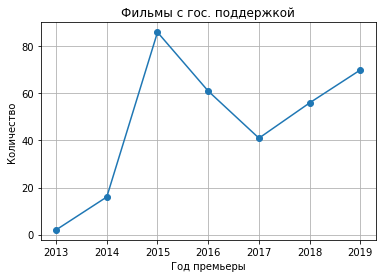

In [84]:
mkrf_support.groupby('show_start_year')['total_support'].count().plot(grid=True, style='o-')
plt.title('Фильмы с гос. поддержкой')
plt.xlabel('Год премьеры')
plt.ylabel('Количество');

Видим, что с 2014 года кол-во картин с господдержкой (16 картин) резко увеличивается и достигает максимума (86 картин) в 2015 году, однако к 2017 году наблюдается спад почти в два раза (41 картина). Далее, до конца рассматриваемого периода, происходит уверенный рост. В 2013 году кол-во картин с господдержкой было всего 2 картины.

В годах 2013 и 2014 мало данных для анализа. Рассмотрим период с 2015 - 2019.

In [85]:
mkrf_support = mkrf_support.query('2014 < show_start_year')

In [86]:
# Выведем общую сумму господдержки за всеь период:
mkrf_support['total_support'].sum()

19494338068.0

Сумма, выделенная на поддержку кино, за изучаемый период составила 19,494,338,068 рублей

#### Распределение господдержки по годам

In [87]:
# Посмотрим на распределение господдержки по годам:
mkrf_support.groupby('show_start_year')['total_support'].sum()

show_start_year
2015   3,656,241,459.000
2016   4,303,155,482.000
2017   3,183,971,662.000
2018   3,446,969,465.000
2019   4,904,000,000.000
Name: total_support, dtype: float64

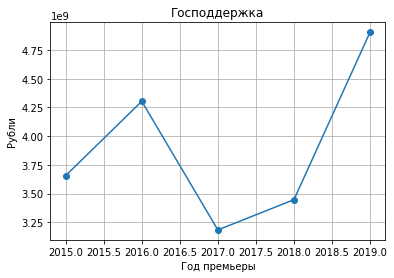

In [88]:
mkrf_support.groupby('show_start_year')['total_support'].sum().plot(grid=True, style='o-')
plt.title('Господдержка')
plt.xlabel('Год премьеры')
plt.ylabel('Рубли');

Минимум суммы приходится на все тот же 2017 год. Максимум на 2019 год.

#### Рейтинг по годам

In [89]:
# Посмотрим на распределение рейтинга по годам:
mkrf_support.groupby('show_start_year')['ratings'].agg(['max', 'min', 'mean', 'median'])

,max,min,mean,median
show_start_year,,,,
2015,9.400,2.800,6.140,6.200
2016,8.500,1.000,5.677,5.800
2017,8.000,2.900,6.000,6.200
2018,7.700,2.500,6.002,6.200
2019,8.200,3.200,6.176,6.200


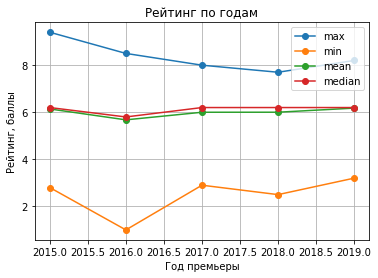

In [90]:
mkrf_support.groupby('show_start_year')['ratings'].agg(['max', 'min', 'mean', 'median']).plot(grid=True, style='o-')
plt.title('Рейтинг по годам')
plt.xlabel('Год премьеры')
plt.ylabel('Рейтинг, баллы');

Если смотреть по среднему значению рейтинга, то 2016 год был самым худшим - 1 балл. Если смотреть по медианному значению рейтинга, то здесь тоже на графике "провал" по сравнению с остальными годами- 5.8 балла. "В среднем" по остальным годам особых изменений в рейтинге нет - 6.2 балла. Больше всего господдержки было в 2019 году (4,9 млрд руб.), а меньше всего в 2017 году (3,18 млрд руб.). Картины с самым высоким рейтингом выходила в 2015 и 2016 году - 8.5 балла. 2016 год был второй по сумме поддержки - 4,3млрд руб.

#### Корреляция данных

In [91]:
mkrf_support.corr()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,support_percent,show_start_year,total_support,earn,loss,profit
pu_number,1.000,0.007,-0.031,-0.017,0.036,0.045,0.005,-0.028,-0.023,-0.025,-0.091,-0.028
refundable_support,0.007,1.000,0.361,0.659,0.003,0.308,-0.014,0.064,0.640,-0.049,-0.144,0.163
nonrefundable_support,-0.031,0.361,1.000,0.631,0.128,0.457,0.129,0.107,0.948,0.133,-0.139,0.142
budget,-0.017,0.659,0.631,1.000,0.087,0.379,-0.292,0.154,0.746,-0.185,-0.087,0.102
ratings,0.036,0.003,0.128,0.087,1.000,0.149,-0.051,0.037,0.106,0.098,-0.058,0.060
box_office,0.045,0.308,0.457,0.379,0.149,1.000,-0.108,0.106,0.489,0.839,-0.537,0.537
support_percent,0.005,-0.014,0.129,-0.292,-0.051,-0.108,1.000,-0.091,0.101,0.069,0.043,-0.051
show_start_year,-0.028,0.064,0.107,0.154,0.037,0.106,-0.091,1.000,0.110,0.019,-0.103,0.016
total_support,-0.023,0.640,0.948,0.746,0.106,0.489,0.101,0.110,1.000,0.092,-0.164,0.172
earn,-0.025,-0.049,0.133,-0.185,0.098,0.839,0.069,0.019,0.092,1.000,-0.509,0.509


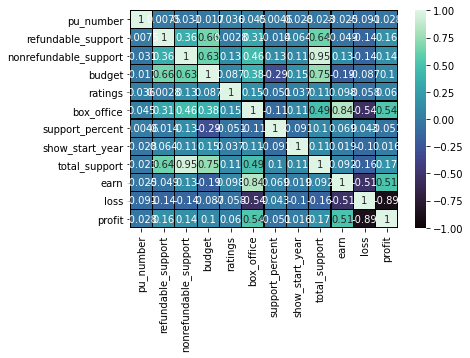

In [92]:
sns.heatmap(mkrf_support.corr(), 
            annot = True,
            vmin=-1,
            vmax=1,
            center= 0, 
            cmap= 'mako', 
            linewidths=0.3, 
            linecolor='black');

Корреляция господдержки наблюдается только с бюджетом и напрямую связанными с ним данными, что логично (с ростом господдержки растет и бюджет, соответсвенно имеется влияние и на "кассовый" сбор). На рейтинг и на все остальные показатели сумма господдержки особо не влияет. Размер государственного финансирования практически не влияет на интерес зрителя и соответственно на сборы.

#### Средний рейтинг фильмов с господдрежкой по жанрам:

In [93]:
# Посмотрим на средний рейтинг фильмов с господдрежкой по жанрам:
mkrf_support[['genres_main', 'ratings']].groupby('genres_main').agg('mean').sort_values(by='ratings', ascending=False)

,ratings
genres_main,
криминал,7.500
детский,7.125
спорт,6.933
биография,6.900
детектив,6.760
боевик,6.583
мюзикл,6.550
военный,6.467
драма,6.421


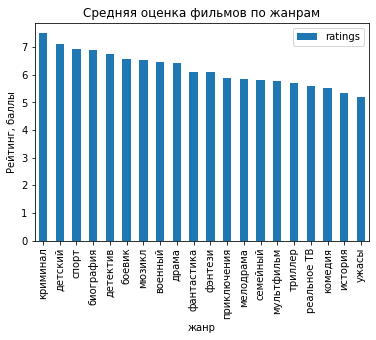

In [94]:
(mkrf_support[['genres_main', 'ratings']]
    .groupby('genres_main')
    .agg('mean')
    .sort_values(by='ratings', ascending=False)
    .plot(kind='bar')
)
plt.title('Cредняя оценка фильмов по жанрам')
plt.xlabel('жанр')
plt.ylabel('Рейтинг, баллы');

Топ-3 средней оценки рейтинга возглавляют: Криминал, Детский, Спорт.

#### Количество фильмов по жанрам с господдрежкой

In [95]:
# Посмотрим на распределение фильмов по жанрам с господдрежкой:
mkrf_support['genres_main'].value_counts()

драма          85
комедия        71
мультфильм     30
триллер        15
мелодрама      13
фэнтези        11
фантастика     10
ужасы          10
военный         9
приключения     7
боевик          6
детектив        5
семейный        5
мюзикл          4
детский         4
история         4
спорт           3
биография       3
криминал        3
реальное ТВ     1
Name: genres_main, dtype: int64

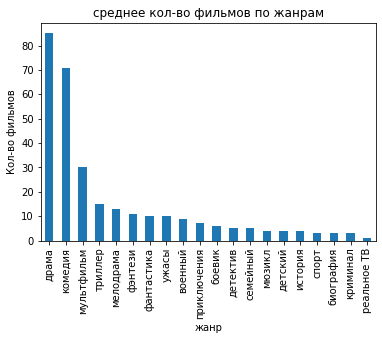

In [96]:
# Посмотрим на кол-во фильмов по жанрам с господдрежкой:
mkrf_support['genres_main'].value_counts().plot(kind='bar')
plt.title('среднее кол-во фильмов по жанрам')
plt.xlabel('жанр')
plt.ylabel('Кол-во фильмов');

Большей частью господдержку получали фильмы жанров Драма (85 картин), Комедия(71 картин),Триллер (15 картин), Мелодрамма (13 картин) и т.д. На третьем месте мультфильмы (30). А самые рейтенговые категории оказались на последних местах (с конца списка - 3-й Криминал (3 картины), 4-й Спорт (3 картины) и 5-й Детский (4 картины)).

#### Объём государственной поддержки по жанрам

In [97]:
# Оценим объём государственной поддержки по жанрам:
mkrf_support.groupby('genres_main').agg('sum').sort_values(by='total_support', ascending=False)

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,support_percent,show_start_year,total_support,earn,loss,profit
genres_main,,,,,,,,,,,,
драма,9435822839,"628,346,881.000","4,390,557,452.000","10,534,332,207.753",545.800,"9,393,990,547.840",46.206,171444,"5,018,904,333.000","-843,307,510.913",65,14
комедия,7881744185,"796,500,000.000","2,255,935,000.000","5,969,964,341.158",391.100,"12,060,398,000.330",38.394,143187,"3,052,435,000.000","6,240,581,161.172",42,28
мультфильм,3517111409,"900,000,000.000","1,491,520,000.000","5,896,149,181.718",173.300,"5,308,524,288.160",13.216,60509,"2,391,520,000.000","-568,918,813.558",22,7
фантастика,1110105572,"190,000,000.000","1,191,000,000.000","2,529,365,815.508",61.000,"1,674,669,432.290",4.704,20173,"1,381,000,000.000","89,303,616.782",7,2
фэнтези,1221124685,"233,000,000.000","799,900,000.000","2,340,123,765.000",67.000,"995,836,607.970",6.087,22185,"1,032,900,000.000","-1,344,287,157.030",10,1
история,444038874,"200,000,000.000","820,000,000.000","2,145,062,206.000",21.400,"1,455,468,234.570",1.712,8074,"1,020,000,000.000","-689,593,971.430",3,1
триллер,1665155650,"130,000,000.000","639,645,285.000","1,388,674,821.402",85.600,"700,450,190.140",8.437,30251,"769,645,285.000","-688,224,631.262",13,2
приключения,777062125,"255,000,000.000","441,000,000.000","3,374,742,189.000",41.100,"1,205,596,976.620",2.597,14125,"696,000,000.000","-2,111,269,212.380",5,1
детектив,555032785,"55,000,000.000","430,000,000.000","1,198,222,297.000",33.800,"138,547,511.400",2.461,10086,"485,000,000.000","-1,059,674,785.600",5,0


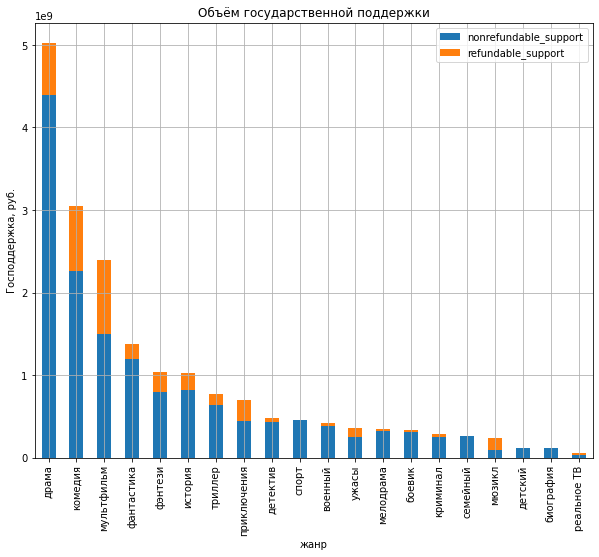

In [98]:
(
    mkrf_support.groupby('genres_main')
    .agg('sum')
    .sort_values(by='total_support',
                 ascending=False)
    .plot(kind='bar', 
          grid=True,
          figsize=(10,8),
          stacked=True,
          y=['nonrefundable_support', 'refundable_support'])
)
plt.title('Объём государственной поддержки')
plt.xlabel('жанр')
plt.ylabel('Господдержка, руб.');

Наивысший объём невозвратных средств государственной поддержки имеют драма, криминал и мультфильмы. По-видимому это приоритетные направления для Министерства культуры.

#### Колличество прибыльных и убыточных фильмов по жанрам

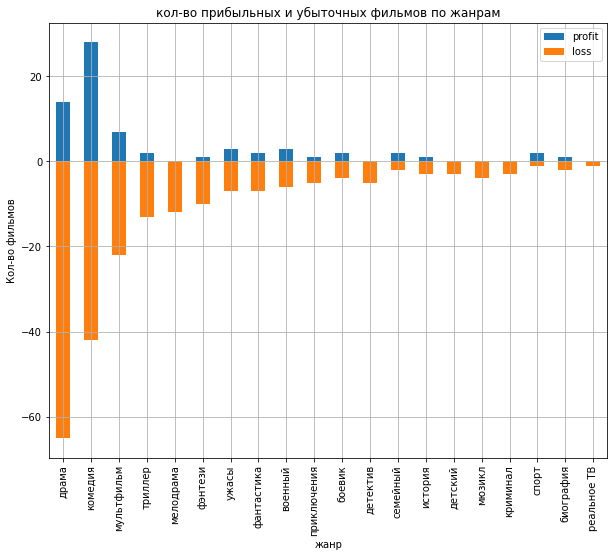

In [99]:
# Оценим кол-во прибыльных и убыточных фильмов по жанрам:
(mkrf_support.groupby('genres_main')
    .agg({'title': 'count', 
          'profit': 'sum',
          'loss': lambda x: 0 - x.sum()})
    .sort_values(by='title',
                 ascending=False)
    .plot(kind='bar',
          grid=True,
          figsize=(10,8),
          stacked=True,
          y=['profit', 'loss'])
)
plt.title('кол-во прибыльных и убыточных фильмов по жанрам')
plt.xlabel('жанр')
plt.ylabel('Кол-во фильмов');

In [100]:
# Кол-во фильмов с господдержкой принесшие прибыль:
mkrf_support.query('profit')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percent,show_start_year,director_main,genres_main,total_support,age_restriction_shot,earn,loss,profit
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,Unknown,«12+» - для детей старше 12 лет,"50,000,000.000","100,000,000.000","220,588,394.000",Фонд кино,8.500,"драма,военный,история","249,166,767.700",0.680,2015,Р.Давлетьяров,драма,"150,000,000.000",«12+»,"28,578,373.700",False,True
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.000,"75,000,000.000","139,551,503.000",Фонд кино,7.000,"триллер,боевик,приключения","352,804,320.400",0.537,2015,А.Войтинский,триллер,"75,000,000.000",«6+»,"213,252,817.400",False,True
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,"75,000,000.000","122,142,351.753",Фонд кино,6.600,драма,"446,163,511.000",0.614,2015,Р.Прыгунов,драма,"75,000,000.000",«16+»,"324,021,159.247",False,True
2092,Батальонъ,111000715,2015-01-29 12:00:00+00:00,Художественный,"ООО ""Корнер Ворк"", ООО ""Арт Пикчерс Студия""",Россия,Д.Месхиев,И.Угольников,«12+» - для детей старше 12 лет,0.000,"56,579,055.000","436,437,176.000","Министерство культуры, Фонд кино",7.100,"драма,военный,история","451,812,221.700",0.130,2015,Д.Месхиев,драма,"56,579,055.000",«12+»,"15,375,045.700",False,True
2132,Битва за Севастополь,111001415,2015-02-20 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+» - для детей старше 12 лет,0.000,"27,510,000.000","131,000,000.000",Министерство культуры,7.500,"биография,военный,драма","401,804,461.900",0.210,2015,С.Мокрицкий,биография,"27,510,000.000",«12+»,"270,804,461.900",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6972,Верность,111009119,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Друг Друга"", ООО ""1-2-3 Продакшн""",Россия,Н.Сайфуллаева,"С.Корнихин, В.Федорович, Е.Никишов, П.Лилиенфе...",«18+» - запрещено для детей,0.000,"30,000,000.000","46,300,000.000",Министерство культуры,6.200,драма,"97,637,352.290",0.648,2019,Н.Сайфуллаева,драма,"30,000,000.000",«18+»,"51,337,352.290",False,True
6991,Давай разведемся!,111009519,2019-06-12 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Пармас,"С.Сельянов, К.Эрнст, Н.Дрозд-Макан",«12+» - для детей старше 12 лет,0.000,"25,000,000.000","38,000,000.000",Министерство культуры,5.900,комедия,"103,098,290.540",0.658,2019,А.Пармас,комедия,"25,000,000.000",«12+»,"65,098,290.540",False,True
7453,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,"80,000,000.000","40,000,000.000","270,000,000.000",Фонд кино,7.500,"мультфильм,детский,приключения","387,590,521.720",0.444,2019,В.Бедошвили,мультфильм,"120,000,000.000",«6+»,"117,590,521.720",False,True
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.000","35,000,000.000","160,000,000.000",Фонд кино,6.800,комедия,"3,073,568,690.790",0.375,2019,К.Шипенко,комедия,"60,000,000.000",«12+»,"2,913,568,690.790",False,True


 Если кассовый сбор, предоставленный нам, является общим (кассовые сборы принято делить между двумя основными участниками: производителями фильмов и кинотеатрами), то по этим графикам видим, что большая часть картин все же не окупается. Количество фильмов, принесших прибыль - 70 из 332.

#### Топ - 10 фильмов с господдержкой принесших прибыль

In [101]:
mkrf_profit = mkrf_support.pivot_table(index=['title','director_main'], values=['earn', 'ratings'])
mkrf_profit.sort_values(by='earn', ascending=False).head(10)

,,earn,ratings
title,director_main,,
Холоп,К.Шипенко,"2,913,568,690.790",6.800
Движение вверх,А.Мегердичев,"2,189,493,953.000",7.500
Т-34,А.Сидоров,"1,707,969,287.520",6.500
Последний богатырь,Д.Дьяченко,"1,302,560,113.000",6.800
Лёд,О.Трофим,"1,297,146,575.890",NaN
Экипаж .,Н.Лебедев,"766,971,523.000",7.600
Ёлки Новые,Д.Киселев,"681,069,130.000",5.800
Притяжение (2016),Ф.Бондарчук,"631,180,316.492",5.600
Три богатыря и принцесса Египта,К.Феоктистов,"584,762,378.000",5.500


Лидером по прибыли является картина "Холоп" режиссера К.Шипенко - 3.173 млрд руб., хотя ее рейтинг (6.8 баллов) не является наивысшим по отношению к другим фильмам Топ-10. При этом наивысший по рейтингу (7.6 балла) "Экипаж" режиссера Н.Лебедева уступает по прибыли в 4 раза. При этом по уровню рейтинга среди отечественного синематографа оба находятся в топе.

#### Топ - 10 режиссеров фильмов с господдержкой принесших прибыль

In [102]:
mkrf_profit = mkrf_support.pivot_table(index='director_main', values=['earn'], aggfunc={'sum','count'})
mkrf_profit .columns = ['_'.join(col).strip() for col in mkrf_profit .columns.values]
mkrf_profit .sort_values(by='earn_sum', ascending=False).head(10)

,earn_count,earn_sum
director_main,,
К.Шипенко,2,"3,172,514,510.790"
А.Мегердичев,1,"2,189,493,953.000"
А.Сидоров,1,"1,707,969,287.520"
Д.Дьяченко,4,"1,624,203,322.120"
О.Трофим,1,"1,297,146,575.890"
Н.Лебедев,1,"766,971,523.000"
Д.Шмидт,3,"698,312,261.000"
Д.Киселев,2,"696,959,413.000"
Ф.Бондарчук,1,"631,180,316.492"


Работы режиссеров К.Шипенко, Д.Дьяченко и Д.Шмидт стабильно приносят прибыль более,
чем с одной картины.

#### На сколько эффективна господдержка? Сравнение российских фильмов с господдержкой и без нее по рейтингу и сборам

In [103]:
# Российские фильмы с господдержкой:
mkrf_supported = mkrf.loc[(mkrf['production_country'] == 'Россия') & (mkrf['total_support'].isna()==False)]
mkrf_supported[['ratings', 'box_office']]. describe ()

,ratings,box_office
count,301.000,304.000
mean,6.010,"134,623,539.629"
std,1.162,"341,009,125.377"
min,1.000,"1,550.000"
25%,5.300,"1,227,869.875"
50%,6.200,"16,390,500.495"
75%,6.700,"106,934,534.823"
max,9.400,"3,073,568,690.790"


In [104]:
# Российские фильмы без господдержки:
mkrf_not_supported = mkrf.loc[(mkrf['production_country'] == 'Россия') & (mkrf['total_support'].isna()==True)]
mkrf_not_supported[['ratings', 'box_office']].describe ()

,ratings,box_office
count,997.000,476.000
mean,6.179,"21,197,036.500"
std,1.437,"107,416,501.672"
min,1.100,0.000
25%,5.400,"5,301.500"
50%,6.400,"87,853.000"
75%,7.200,"2,928,531.550"
max,9.900,"1,682,680,039.030"


Рейтинги российские фильмов без господдержки, в среднем, выше рейтингов российских фильмы с господдержкой. Возможно потому, что колличество фильмов без господдержки в выборке превышает в 3 раза колличество фильмов с господдержкой.(так сказать: колличество переходит в качество)  

Сборы российских фильмов с господдержкой в среднем значении превышают сборы российских фильмов без господдержки в 6 раз. Медианое значение - почти в 14 раз. Однозначно можно сказать, что наличие господдержки имеет существенное влияние на кассовые сборы.

### Шаг 5. Напишите общий вывод

В предоставленном наборе данных (размером 7486 строк на 14 колонок) была проведена предобработка данных (согласно приведенному ниже чек-листу) для проведения исследовательского анализа данных по следующим вопросам:

1. Cколько фильмов выходило в прокат каждый год?
    - Количество фильмов, получившие прокатное удостоверение - 7486;
    - Количество картин, которые имели кассовые сборы и, следовательно, были показаны в кинотеатре - 3159; 
    - Количество фильмов по годам:  
    
            2010 - 105 шт.  
            2011 - 109 шт.  
            2012 - 128 шт.  
            2013 - 184 шт.  
            2014 - 280 шт.  
            2015 - 465 шт.  
            2016 - 526 шт.  
            2017 - 357 шт.  
            2018 - 475 шт.  
            2019 - 530 шт.;  
        
        Несмотря на то, что в 2017 году отмечается провал в количестве фильмов в прокате - сумма кассового сбора, на основе исследования, продолжает свой рост.

2. Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах?  Как эта доля менялась по годам? Сделайте вывод о том, какой период полнее всего представлен в данных?  

      - В данной выборке меньше всего фильмов, показанных в кинотеатре, с 2010 по 2014. Доля варьируется от 10% до 35%. В связи с этим нельзя говорить о том, что в эти годы было выдано меньше прокатных удостоверений. Самое большое количество кинопоказов в кинотеатрах в 2019 - 530, хотя доля этих фильмов за этот год (57%) в нашей выборке не самая большая в сравнении с другими годами. В 2017 году самая большая доля - 70.7%. Доля фильмов, для которых есть информация о сборах, составляет 42% от общего объема;  
      - Максимум суммы сборов по годам приходится на 2018 год. Года с 2010 по 2013 в расчет не берем, так как по ним меньше всего данных. В период с 2013 по 2018 год наблюдается уверенный рост сборов. С 2018 года наблюдается небольшое снижение;  
      - Для сборов очень большой разброс данных,это видно по разнице между средним и медианным значениями. В данных присутствуют значения с невероятно большими сборами по сравнению с остальными. Для кино это нормально. В среднем, самый прибыльный год был 2017. Это видно и по медиане (9.9 млрд руб.), и по средней (136 млрд руб.). Самый большой сбор был в 2018 году - 49,6 млрд руб.

3. Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?  

    - Сборы по возрастным ограничениям с 2015 по 2019 год в руб.:  
    
    
            «0+» - для любой зрительской аудитории - 809,077,425.970;  
            «18+» - запрещено для детей            - 40,759,615,572.120;  
            «6+» - для детей старше 6 лет          - 55,798,610,799.680;  
            «12+» - для детей старше 12 лет        - 60,619,446,628.330;  
            «16+» - для детей старше 16 лет        - 76,034,733,643.630;  
            
    - Картины с возрастным ограничением «16+» собрали больше всего денег в прокате.  
    - Почти во все года лидирует по сборам кино «16+», в 2015 в лидерах кино «12+», а в 2019 - «6+». Так же видно, что 2018 год, хоть и не рекордный по сборам в категориях («0+», «6+», «16+», «18+»), однако сборы в категории «12+» самые высокие за весь рассматриваемый период, что делает год 2018 самым "кассовым" среди других лет. Категории «6+» и «12+» - стабильно обгоняют категорию «18+» , по-видимому из-за максимально охватываемой аудитории.

4. Исследуйте фильмы, которые получили государственную поддержку.  
   
   Из 7486 картин в сводном датафрейме всего 314 картин имеют господдержку. Явно провальные премьеры и хиты с большим рейтингом и огромным сбором имеют большое влияние на средние и медианные значения исследовательского анализа. 
   
    - Количество вышедших фильмов в прокат с господдержкой, шт.;  
   
           2013  - 2;  
           2014  - 16;  
           2015  - 86;  
           2016  - 61;  
           2017  - 41;  
           2018  - 56;  
           2019  - 70;
           
    - С 2014 года кол-во картин с господдержкой (16 картин) резко увеличивается и достигает максимума (86 картин) в 2015 году, однако к 2017 году наблюдается спад почти в два раза (41 картина). Далее, до конца рассматриваемого периода, происходит уверенный рост. В 2013 году кол-во картин с господдержкой было всего 2 картины;
    - В годах 2013 и 2014 мало данных для анализа (2 и 16 картин соответственно). В дальнейшем анализе рассматриваем в период с 2015 - 2019 годы.
    - Сумма, выделенная на поддержку кино, за изучаемый период составила 19,494,338,068 рублей. Минимум суммы приходится на все тот же 2017 год. Максимум на 2019 год;
    - Если смотреть по среднему значению рейтинга, то 2016 год был самым худшим - 1 балл. Медианному значению рейтинга, то здесь тоже на графике "провал" по сравнению с остальными годами - 5.8 балла. "В среднем" по остальным годам особых изменений в рейтинге нет - 6.2 балла. Больше всего господдержки было в 2019 году (4.9 млрд руб.), а меньше всего в 2017 году (3.18 млрд руб.). Картины с самым высоким рейтингом выходила в 2015 и 2016 году - 8.5 балла. 2016 год был вторым по сумме поддержки - 4,3 млрд руб.;
    - Топ-3 средней оценки рейтинга возглавляют: Криминал (7.5 балла), Детский (7.1 балла), Спорт (6.9 балла).
    - Корреляция господдержки наблюдается только с бюджетом и напрямую связанными с ним данными, что логично (с ростом господдержки растет и бюджет, соответсвенно имеется влияние и на "кассовый" сбор). На рейтинг и на все остальные показатели сумма господдержки особо не влияет. Размер государственного финансирования практически не влияет на интерес зрителя и соответственно на сборы;
    - Большей частью господдержку получали фильмы жанров Драма (85 картин), Комедия (71 картин),Триллер (15 картин), Мелодрама (13 картин) и т.д. На третьем месте мультфильмы (30). А самые рейтинговые категории оказались на последних местах (с конца списка - 3-й Криминал (3 картины), 4-й Спорт (3 картины) и 5-й Детский (4 картины));
    - Наивысший объём невозвратных средств государственной поддержки имеют драма (4.39 млрд руб.), криминал (2.26 млрд руб.) и мультфильмы (1.26 млрд руб.). По-видимому, это приоритетные направления для Министерства культуры;
    - Если кассовый сбор, предоставленный нам, является общим (кассовые сборы принято делить между двумя основными участниками: производителями фильмов и кинотеатрами), то на основании проведенного исследования можно сделать вывод, что большая часть картин все же не окупается. Количество фильмов, принесших прибыль - 70 из 332.
    -Рейтинги российские фильмов без господдержки, в среднем, выше рейтингов российских фильмы с господдержкой. Сборы российских фильмов с господдержкой в среднем значении превышают сборы российских фильмов без господдержки в 6 раз. Медианое значение - почти в 14 раз. Наличие господдержки имеет существенное влияние на кассовые сборы.
    - Лидером по прибыли является картина "Холоп" режиссера К.Шипенко - 3.173 млрд руб., хотя ее рейтинг (6.8 баллов) не является наивысшим по отношению к другим фильмам Топ-10. При этом наивысший по рейтингу (7.6 балла) "Экипаж" режиссера Н.Лебедева уступает по прибыли в 4 раза. При этом по уровню рейтинга среди отечественного синематографа оба находятся в топе.
    - Работы режиссеров К.Шипенко, Д.Дьяченко и Д.Шмидт стабильно приносят прибыль более, чем с одной картины.

Не смотря на то, что финансирование отечественной киноиндустрии в большинстве случаев является убыточным, не надо забывать, что для государства важно иметь развитую киноиндустрию, так как кино несет на себе как культурно-просветительскую, так и социально-политическую функции. Кино нужно государству одновременно для позиционирования себя в международном пространстве и для создания определенной культурной атмосферы у граждан собственной страны.

Возвращаясь к первоначальному вопросу "Какие фильмы интересны зрителю?" можно сказать, что это фильмы жанров спорт, детский и криминал в возрастной категории «6+», «12+», «16+» работ режиссеров Топ-10. Данный подход ориентирован на повышение эффективности господдержки.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Откройте файлы с данными и объедините их в один датафрейм. Объедините данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм.
- [x]  Предобработка данных
    -	Проверьте типы данных в датафрейме и преобразуйте там, где это необходимо.
    -	Изучите пропуски в датафрейме. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.
    -	Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.
    -	Изучите столбцы, которые содержат категориальные значения: 
        -	Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
        -	Исправьте проблемные значения в поле type.
    -	Изучите столбцы, которые хранят количественные значения. Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?
    -	Добавьте новые столбцы: 
        -	Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма;
        -	Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значенияиз списка режиссёров и жанров соответственно;
        -	Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.
- [x]  Проведите исследовательский анализ данных
    -	Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.
    -	Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
    -	С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравните значения и сделайте выводы.
    -	Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.
- [x]  Исследуйте фильмы, которые получили государственную поддержку
На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.
- [x]  в каждом этапе есть промежуточные выводы
- [x]  Напишите общий вывод